In [1]:
from utils.classification_function import classfication_procedure

In [2]:
import matplotlib.pyplot as plt


import os
import numpy as np
import torch
import torchvision.datasets as dset
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam,Adagrad
import pyro.poutine as poutine
from torchvision.utils import save_image

import matplotlib.pylab as plt

from PIL import Image # Module for image rotation (making use of PIL)

In [3]:
#from utils.MiraBest import MiraBest
from utils.MiraBest_full import MiraBest_full
from utils.FRDEEP import FRDEEPF
from utils.data_downloader import dataloader_first_noisy
from utils.data_downloader import dataloader_first_FRDEEP

import network_configurations.neural_net_conf_0_2_dropout as network #change this here to change configuration

In [4]:
classification_model = classfication_procedure(30)

Stating Training of CNN
Files already downloaded and verified
stattng training
Epoch: 0, Loss: 2.1898093223571777, Train Accuracy: 0.5300324675324676
Epoch: 0, Loss: 0.7935073001818224, Validation Accuracy: 0.41825139379346526
Final validation error:  58.17486062065347
Accuracy of the network on the test images: 48 %
Accuracy of   FRI : 100 %
Accuracy of  FRII :  7 %
---------------------------------------------------------------------
Model Saved
Epoch: 1, Loss: 1.1200904846191406, Train Accuracy: 0.557224025974026
Epoch: 1, Loss: 0.6830770682978939, Validation Accuracy: 0.517741190226047
Final validation error:  48.2258809773953
Accuracy of the network on the test images: 58 %
Accuracy of   FRI : 100 %
Accuracy of  FRII : 25 %
---------------------------------------------------------------------
Model Saved
Epoch: 2, Loss: 0.955730676651001, Train Accuracy: 0.5831574675324676
Epoch: 2, Loss: 0.6542029321967782, Validation Accuracy: 0.5634044561293218
Final validation error:  43.65955

Epoch: 22, Loss: 0.3111999034881592, Train Accuracy: 0.7810876623376624
Epoch: 22, Loss: 0.48756554993716156, Validation Accuracy: 0.7815630853950203
Final validation error:  21.843691460497972
Accuracy of the network on the test images: 86 %
Accuracy of   FRI : 90 %
Accuracy of  FRII : 82 %
---------------------------------------------------------------------
Model Saved
Epoch: 23, Loss: 0.17002274096012115, Train Accuracy: 0.7836444805194805
Epoch: 23, Loss: 0.4858942299307167, Validation Accuracy: 0.7731447185788836
Final validation error:  22.685528142111643
Accuracy of the network on the test images: 86 %
Accuracy of   FRI : 90 %
Accuracy of  FRII : 82 %
---------------------------------------------------------------------
Model Saved
Epoch: 24, Loss: 0.7708264589309692, Train Accuracy: 0.7868100649350649
Epoch: 24, Loss: 0.48242419725888736, Validation Accuracy: 0.7818413787073903
Final validation error:  21.815862129260964
Accuracy of the network on the test images: 86 %
Accurac

In [5]:
transform = transforms.Compose([
     #    transforms.CenterCrop(28),
    transforms.RandomRotation(0.,360.),
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))])
trainset = FRDEEPF(root='./FIRST_data', train=True, download=True, transform=transform)  
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=2, batch_size=500)

Files already downloaded and verified


In [6]:
x,y = trainloader

In [7]:
from numpy import asarray
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import exp

In [8]:
import numpy as np

In [9]:
def calculate_inception_score(p_yx, eps=1E-16):
	# calculate p(y)
	p_y = expand_dims(p_yx.mean(axis=0), 0)
	# kl divergence for each image
	kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
	# sum over classes
	sum_kl_d = kl_d.sum(axis=1)
	# average over images
	avg_kl_d = mean(sum_kl_d)
	# undo the logs
	is_score = exp(avg_kl_d)
	return is_score

In [14]:
inception_score_noise = []
noise_value = []
for alpha in range (0.0,1.0,0.05):
    noise=np.random.random((500,1,150,150))*alpha
    array_noise = torch.from_numpy(noise).float().to("cpu")
    x_data=x[0]+array_noise
    valid_pred = classification_model(x_data.cuda())
    m = nn.Softmax(dim=1)
    values=m(valid_pred).cpu().detach().numpy()
    score = calculate_inception_score(values)
    noise_value.append(noise)
    inception_score_noise.append(score)

TypeError: 'float' object cannot be interpreted as an integer

In [10]:
#def cropping_score(edge_size,x):

inception_score = []
edge_value = []
for i in range(0,75,1):
    fullsize_image = np.zeros((500,1,150,150))
    edge = i
    for i in range (0,500):
        x_tocrp = x[0][i,0,:,:].cpu().detach().numpy()
        fullsize_image[i,0,edge:150-edge,edge:150-edge]=x_tocrp[edge:150-edge,edge:150-edge]
    image_to_test = torch.from_numpy(fullsize_image).float().to("cuda:0")

    valid_pred = classification_model(image_to_test)
    m = nn.Softmax(dim=1)
    values=m(valid_pred).cpu().detach().numpy()
    score = calculate_inception_score(values)
    inception_score.append(score)
    edge_value.append(edge)

In [26]:
edge_value

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [27]:
inception_score

[1.3892423,
 1.3887277,
 1.3868738,
 1.3840255,
 1.3811108,
 1.3772914,
 1.3747144,
 1.3722751,
 1.3677453,
 1.3638283,
 1.3612721,
 1.3539107,
 1.3485335,
 1.3428478,
 1.3359785,
 1.3314878,
 1.325557,
 1.3190933,
 1.3115635,
 1.3048303,
 1.2978019,
 1.2889397,
 1.2790467,
 1.2702991,
 1.2604904,
 1.2494091,
 1.2404444,
 1.2249676,
 1.213203,
 1.2031481,
 1.1939538,
 1.1817819,
 1.169705,
 1.1647525,
 1.1587654,
 1.1472654,
 1.1376361,
 1.1299292,
 1.1232424,
 1.1129118,
 1.106492,
 1.0975602,
 1.093135,
 1.0848924,
 1.080625,
 1.0746707,
 1.0713314,
 1.0689217,
 1.066286,
 1.0625333,
 1.0607952,
 1.0569121,
 1.0566458,
 1.0548253,
 1.0534524,
 1.0512549,
 1.0511403,
 1.0500991,
 1.0508416,
 1.0512846,
 1.0510651,
 1.0507002,
 1.049683,
 1.0483646,
 1.047116,
 1.051159,
 1.0536503,
 1.0586516,
 1.0602344,
 1.0694704,
 1.0801605,
 1.0851156,
 1.1054928,
 1.097591,
 1.1159741]

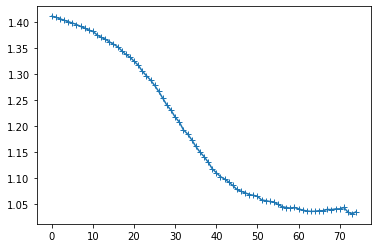

In [11]:
plt.plot(edge_value,inception_score,'+-')

In [15]:
p_yx=asarray([[0.33, 0.33, 0.33],[1,1,1]])

In [16]:
from numpy import expand_dims,asarray

In [17]:
p_y = expand_dims(p_yx.mean(axis=0), 0)

In [18]:
p_y

array([[0.665, 0.665, 0.665]])